In [3]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='D:/dataset/healthy/1-a_l.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [4]:
audio_file_path='D:/dataset/pathological/561-a_lhl.wav'
libosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [5]:
print(librosa_audio_data)
print(libosa_audio_data)

[-0.01416103  0.00679945  0.05568034 ...  0.10350126  0.11146182
  0.08813323]
[0.31210828 0.47397637 0.38048622 ... 0.22966844 0.26631647 0.        ]


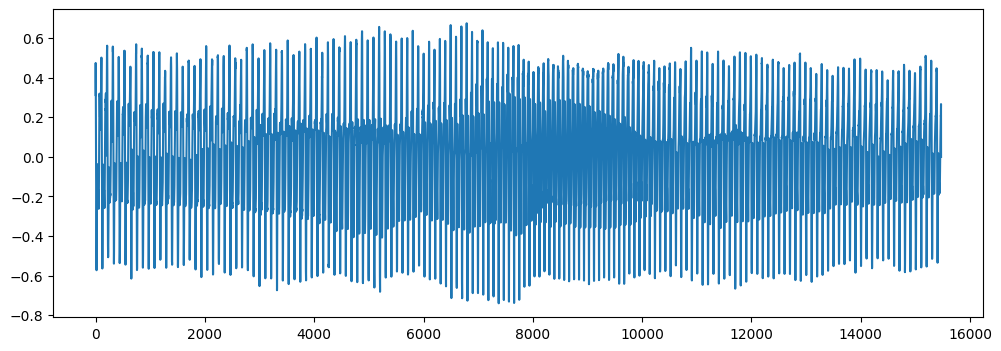

In [6]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
# plt.plot(librosa_audio_data)
plt.plot(libosa_audio_data)

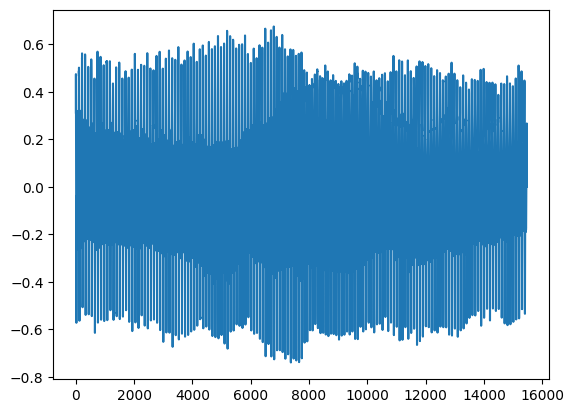

In [7]:
plt.plot(libosa_audio_data)

In [8]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa
import pandas as pd
import numpy as np


In [9]:
import pandas as pd
from pydub import AudioSegment
import os


data_dir = 'D:\dataset'

def extract_features(file_path):
    audio = AudioSegment.from_file(file_path)
    duration = audio.duration_seconds
    
    
    return {
        'file_path': file_path,
        'duration': duration,
    }

features_list = []

for label in ['healthy', 'pathological']:
    label_dir = os.path.join(data_dir, label)
    
    for filename in os.listdir(label_dir):
        if filename.endswith('.wav'):
            file_path = os.path.join(label_dir, filename)
            
            features = extract_features(file_path)
            
            features['label'] = label
            
            features_list.append(features)

df = pd.DataFrame(features_list)

print(df.tail())


c:\Users\DEEPAK\AppData\Local\Programs\Python\Python310\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


                                  file_path  duration         label
1864    D:\dataset\pathological\925-i_n.wav   1.96770  pathological
1865    D:\dataset\pathological\925-u_h.wav   1.17874  pathological
1866    D:\dataset\pathological\925-u_l.wav   1.59148  pathological
1867  D:\dataset\pathological\925-u_lhl.wav   1.14544  pathological
1868    D:\dataset\pathological\925-u_n.wav   1.67996  pathological


In [10]:

csv_file_path = 'dysphonia.csv'

df.to_csv(csv_file_path, index=False)

print(f"DataFrame has been successfully saved to {csv_file_path}")


DataFrame has been successfully saved to dysphonia.csv


In [11]:
data=pd.read_csv("dysphonia.csv")
data.head()

,file_path,duration,label
0,D:\dataset\healthy\1-a_h.wav,1.99352,healthy
1,D:\dataset\healthy\1-a_l.wav,1.93368,healthy
2,D:\dataset\healthy\1-a_lhl.wav,1.42704,healthy
3,D:\dataset\healthy\1-a_n.wav,1.94836,healthy
4,D:\dataset\healthy\1-i_h.wav,0.62324,healthy


In [12]:
data.tail()

,file_path,duration,label
1864,D:\dataset\pathological\925-i_n.wav,1.96770,pathological
1865,D:\dataset\pathological\925-u_h.wav,1.17874,pathological
1866,D:\dataset\pathological\925-u_l.wav,1.59148,pathological
1867,D:\dataset\pathological\925-u_lhl.wav,1.14544,pathological
1868,D:\dataset\pathological\925-u_n.wav,1.67996,pathological


In [13]:
import numpy as np
from tqdm import tqdm
import resampy  
import librosa

extracted_features = []
for index_num, row in tqdm(data.iterrows()):
    file_name=row['file_path']
    final_class_labels = row["label"]
    audio, sample_rate = librosa.load(file_name) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    extracted_features.append([mfccs_scaled_features, final_class_labels])


0it [00:00, ?it/s]

1869it [00:15, 118.93it/s]


In [14]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','label'])
extracted_features_df.head()

,feature,label
0,"[-234.28789, 47.39589, -34.445663, -36.55056, ...",healthy
1,"[-215.07884, 102.238014, -35.83801, -17.622807...",healthy
2,"[-201.52502, 106.307175, -40.84559, -39.983242...",healthy
3,"[-226.80856, 66.601944, -27.219215, -42.401924...",healthy
4,"[-311.3803, 38.118633, -21.941334, 53.864014, ...",healthy


In [15]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df["label"].tolist())

In [16]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [17]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [18]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [20]:
X_train.shape

(1495, 40)

In [21]:
X_test.shape

(374, 40)

In [22]:
y_train.shape

(1495, 2)

In [23]:
y_test.shape

(374, 2)

In [24]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [25]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.optimizers import Adam
from sklearn import metrics

In [26]:
num_labels=y.shape[1]

In [27]:
num_labels

2

In [28]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [30]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [31]:
import keras
from keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100


39/47 [=======================>......] - ETA: 0s - loss: 16.2129 - accuracy: 0.5120 
Epoch 1: val_loss improved from inf to 1.45814, saving model to saved_models\audio_classification.hdf5
47/47 [==============================] - 2s 12ms/step - loss: 15.3158 - accuracy: 0.5084 - val_loss: 1.4581 - val_accuracy: 0.4947
Epoch 2/100
24/47 [==============>...............] - ETA: 0s - loss: 7.0143 - accuracy: 0.5378

c:\Users\DEEPAK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 1.45814 to 0.91365, saving model to saved_models\audio_classification.hdf5
47/47 [==============================] - 0s 5ms/step - loss: 6.1388 - accuracy: 0.5224 - val_loss: 0.9136 - val_accuracy: 0.5455
Epoch 3/100
45/47 [===========================>..] - ETA: 0s - loss: 3.3390 - accuracy: 0.5194
Epoch 3: val_loss improved from 0.91365 to 0.70179, saving model to saved_models\audio_classification.hdf5
47/47 [==============================] - 0s 5ms/step - loss: 3.2890 - accuracy: 0.5217 - val_loss: 0.7018 - val_accuracy: 0.5642
Epoch 4/100
41/47 [=========================>....] - ETA: 0s - loss: 2.0921 - accuracy: 0.5221
Epoch 4: val_loss improved from 0.70179 to 0.68293, saving model to saved_models\audio_classification.hdf5
47/47 [==============================] - 0s 5ms/step - loss: 2.0246 - accuracy: 0.5271 - val_loss: 0.6829 - val_accuracy: 0.5936
Epoch 5/100
40/47 [========================>.....] - ETA: 0s - loss: 1.6919 - accuracy: 0.5133
Epoch 

In [32]:
ta=model.evaluate(X_test,y_test,verbose=0)
ta

[0.5427889823913574, 0.7112299203872681]

In [33]:
def features_ex(file):
    audio, sample_rate = librosa.load(file) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

fp="D:/dataset/pathological/742-u_lhl.wav"
pf=features_ex(fp)
pf=pf.reshape(1,-1)
model.predict(pf)

1/1 [==============================] - 0s 125ms/step


array([[0.24761268, 0.75238734]], dtype=float32)

In [34]:
model.save('dysphonia.h5')

In [35]:
import tensorflow as tf
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(40, 1)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(
    X_train, y_train,
    epochs=100,  # Adjust as needed
    batch_size=32,  # Adjust as needed
    validation_split=0.2,  # Adjust validation split as needed
    verbose=1
)

Epoch 1/100
38/38 [==============================] - 1s 12ms/step - loss: 3.0440 - accuracy: 0.5594 - val_loss: 0.9045 - val_accuracy: 0.6622
Epoch 2/100
38/38 [==============================] - 0s 6ms/step - loss: 0.8594 - accuracy: 0.6288 - val_loss: 0.6194 - val_accuracy: 0.6388
Epoch 3/100
38/38 [==============================] - 0s 6ms/step - loss: 0.6484 - accuracy: 0.6396 - val_loss: 0.5653 - val_accuracy: 0.7057
Epoch 4/100
38/38 [==============================] - 0s 6ms/step - loss: 0.6056 - accuracy: 0.6731 - val_loss: 0.5557 - val_accuracy: 0.7124
Epoch 5/100
38/38 [==============================] - 0s 5ms/step - loss: 0.5831 - accuracy: 0.7115 - val_loss: 0.5514 - val_accuracy: 0.7090
Epoch 6/100
38/38 [==============================] - 0s 5ms/step - loss: 0.5815 - accuracy: 0.6998 - val_loss: 0.5550 - val_accuracy: 0.7124
Epoch 7/100
38/38 [==============================] - 0s 6ms/step - loss: 0.5511 - accuracy: 0.7216 - val_loss: 0.5410 - val_accuracy: 0.7358
Epoch 8/100


In [37]:
model.save("dysphoniacnn.h5")

In [38]:
def features_ex(file):
    audio, sample_rate = librosa.load(file) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

fp="D:\dataset\pathological\925-u_n.wav"
pf=features_ex(fp)
pf=pf.reshape(1,-1)
model.predict(pf)

1/1 [==============================] - 0s 94ms/step


array([[0.01522202, 0.9868507 ]], dtype=float32)